# Assignment 3 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

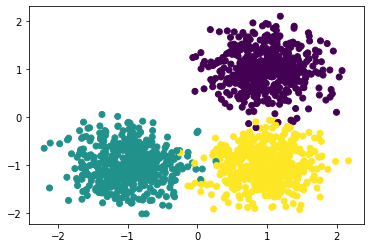

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [4]:
X.shape[1]

2

In [5]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[297.4424490665127, 347.0377989187744, 312.14184565955566, 310.09860758810714, 312.1440604771446, 311.79906288194985, 312.1467347270112, 310.3672439434677, 312.14744439766804, 312.7734375393706, 310.3081703736237]

Min Inertia
297.4424490665127

Low Inertia model
KMeans(init=array([[0.1027516 , 0.0432172 ],
       [0.43343969, 0.11269114],
       [0.45726688, 0.05166192],
       [0.6557561 , 0.07090349],
       [0.53988843, 0.24117504],
       [0.66775378, 0.88493089]]),
       n_clusters=6, n_init=1, random_state=0)


In [6]:
def d_model(km,y):
    
    """ 
             Takes in two variables 
             trained k_means model 
             y: as a numpy array for the target
             prints the class distribution of the model 
    """
    blabs = np.unique(km.labels_)
    for i in blabs:
        distribution = y[km.labels_==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)

d_model(best_model,y)       

Cluster : 0 Class count : (array([1, 2]), array([274,   1]))
Cluster : 1 Class count : (array([1]), array([222]))
Cluster : 2 Class count : (array([1, 2]), array([  4, 224]))
Cluster : 3 Class count : (array([0, 2]), array([  6, 274]))
Cluster : 4 Class count : (array([0, 2]), array([242,   1]))
Cluster : 5 Class count : (array([0]), array([252]))


In [7]:
# Distortion 
best_model.inertia_

297.4424490665127

In [8]:
# Number of clusters
best_model.cluster_centers_

array([[-0.75282031, -0.86748267],
       [-1.30275654, -1.15643359],
       [ 0.63371317, -1.12005108],
       [ 1.24284088, -0.90581116],
       [ 0.73622601,  0.77386113],
       [ 1.1932953 ,  1.21917194]])

In [9]:
# Number of iterations 
best_model.n_iter_

12

In [10]:
# Predictions 
predict = best_model.predict(X)
predict

array([0, 3, 0, ..., 4, 1, 5], dtype=int32)

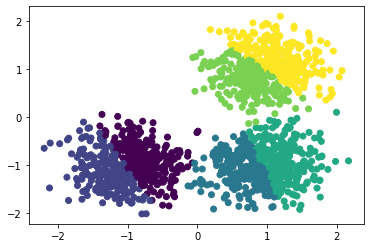

In [11]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)

In [12]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.show()
    return centers, pred

In [13]:
#cluster_membership = np.argmax(u, ax
def fcmeans2(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    #print("Centers")
    #f, axes = plt.subplots(1, 2, figsize=(11,5))
    #axes[0].scatter(X[:,0], X[:,1])
    #axes[1].scatter(X[:,0], X[:,1], c=pred)
    #axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    #plt.show()
    return centers, pred

Centers


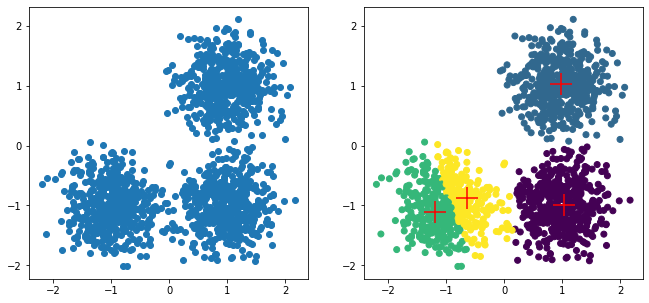

In [14]:
test = fcmeans(X,4)

In [15]:
#np.unique(test[1])
def d_fcmeans(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[1])
    for i in blabs:
        distribution = y[labels[1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)
d_fcmeans(test,y)      

Cluster : 0 Class count : (array([0, 1, 2]), array([  6,   1, 490]))
Cluster : 1 Class count : (array([0]), array([494]))
Cluster : 2 Class count : (array([1]), array([279]))
Cluster : 3 Class count : (array([1, 2]), array([220,  10]))


For i  1
Centers


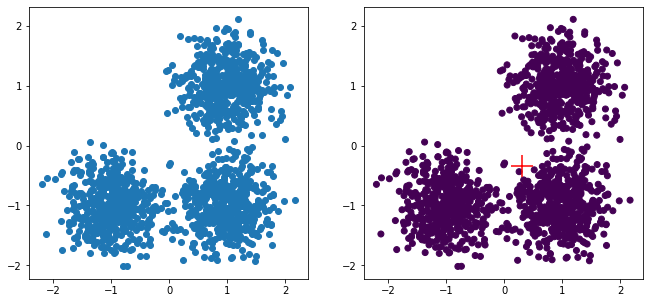

For i  2
Centers


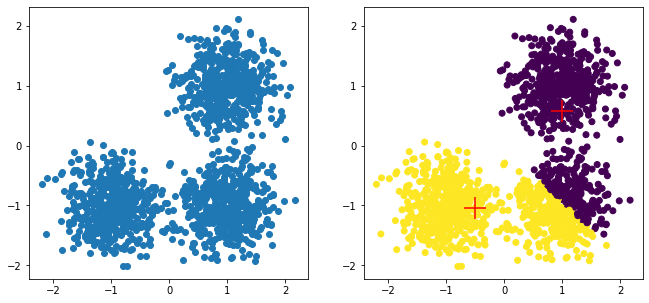

For i  3
Centers


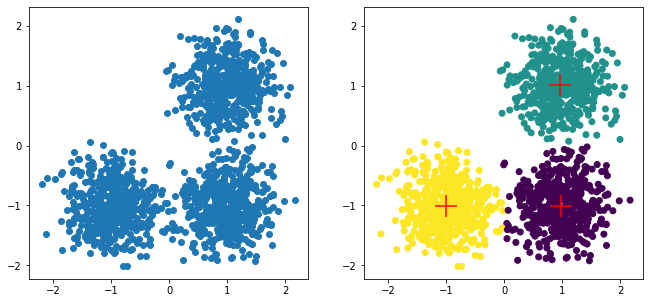

For i  4
Centers


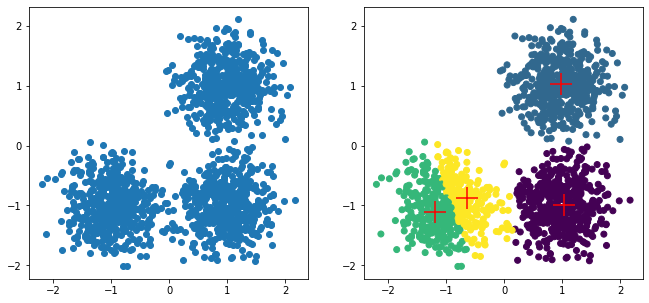

For i  5
Centers


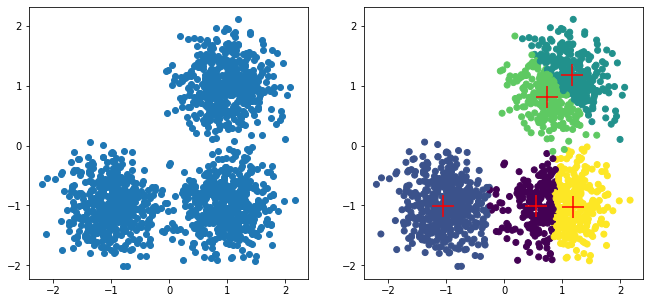

In [16]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [17]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [18]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int 
        returns an array of labels from the iteratations 
    """
    labels = []
    centers = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        plabels = np.argmax(membership[0], axis=1)
        centers.append(membership[1])
        labels.append(plabels)
    return labels ,centers
    
labs = use_posbc(5,5,X)

In [19]:
def d_possbl(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[0][1])
    for i in blabs:
        distribution = y[labels[0][1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Class :",i, "Count :",count)
        
d_possbl(labs,y)

Class : 0 Count : (array([0]), array([495]))
Class : 1 Count : (array([2]), array([465]))
Class : 2 Count : (array([1, 2]), array([ 6, 16]))
Class : 3 Count : (array([0, 2]), array([ 5, 15]))
Class : 4 Count : (array([1, 2]), array([494,   4]))


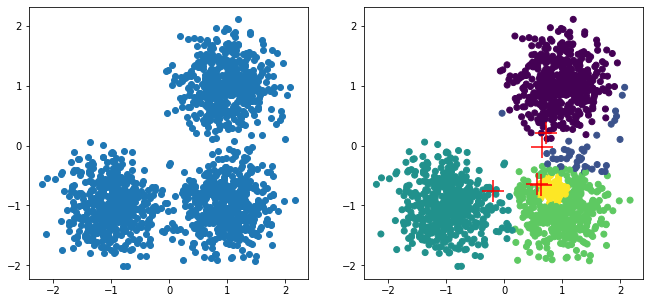

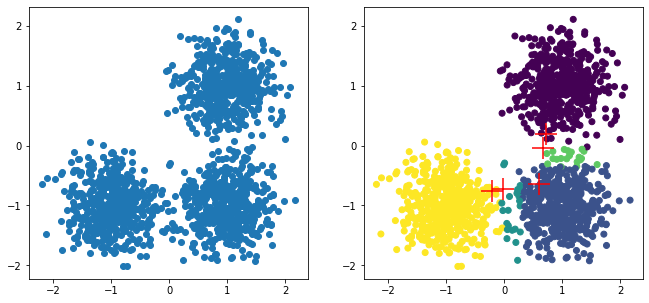

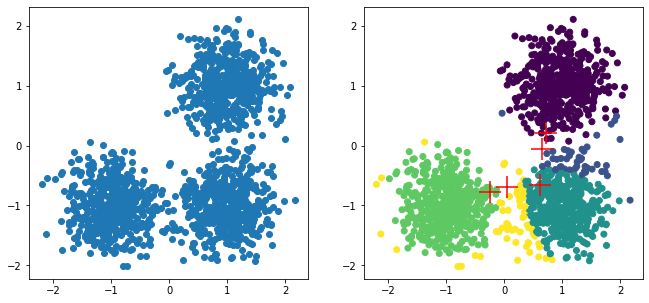

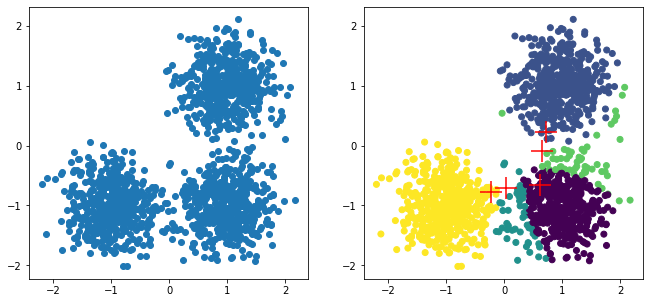

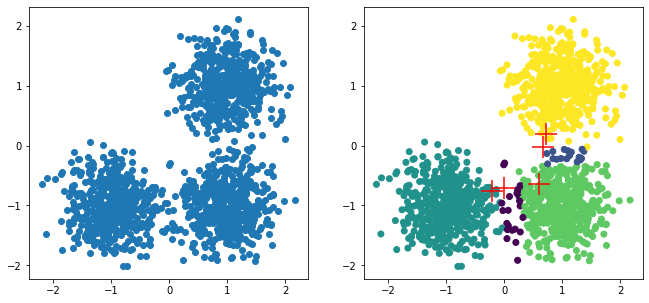

In [20]:
# Plot the output from the  5 iterations 
def plot_it(data,labels):
    """
      This takes in 2 variables. 
      data - This is a numpy array
      labels - This is a tuple of results from use_posbc()
    """
    for i, j in zip(labels[0],labels[1]):
        f, axes = plt.subplots(1, 2, figsize=(11,5))
        axes[0].scatter(data[:,0], data[:,1])
        axes[1].scatter(data[:,0], data[:,1], c=i)
        axes[1].scatter(j[:,0], j[:,1], marker="+", s=500, c='r')
        
plot_it(X,labs)

In [21]:
 #np.any([[True, False], [False, False]], where=[[False], [True]])
            
            #if(np.where(labs[0][i]==i) not in indices):
               # indices.append(np.where(labs[0][i]==i))

## Task 4

In [22]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x)
reduced_data.shape

(1593, 2)

## Possiblistic Cmeans

In [23]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [24]:
type(data)

numpy.ndarray

In [25]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
class_labels = use_posbc(5,5,reduced_data)

In [26]:
#lbs = best_modelt.labels_
tcat = np.argmax(t, axis = 1) # Convert all the columns to one categorical column
#lbs.shape
np.unique(tcat)

clebs = use_posbc(10,10,x) 
#Distribution of class labels 
d_possbl(clebs,tcat)

Class : 8 Count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([161, 162, 159, 159, 161, 159, 161, 158, 155, 158]))


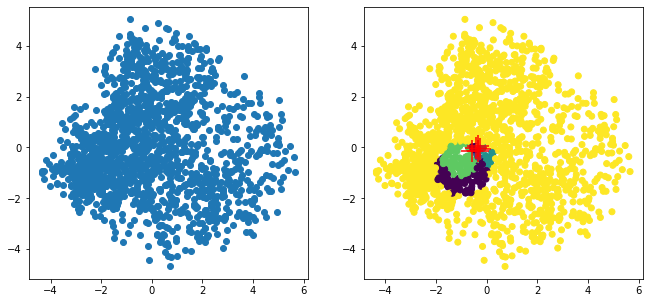

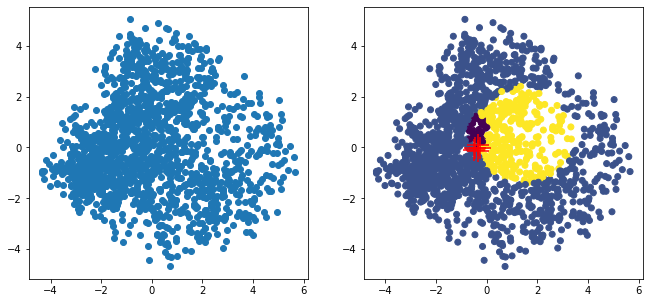

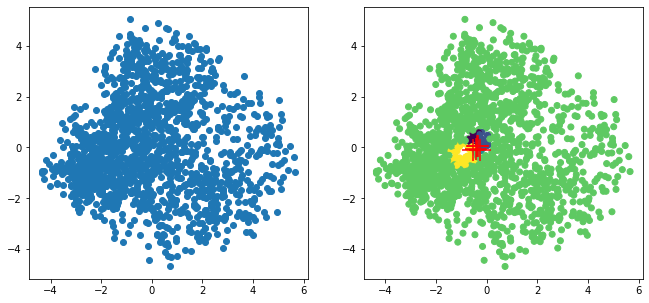

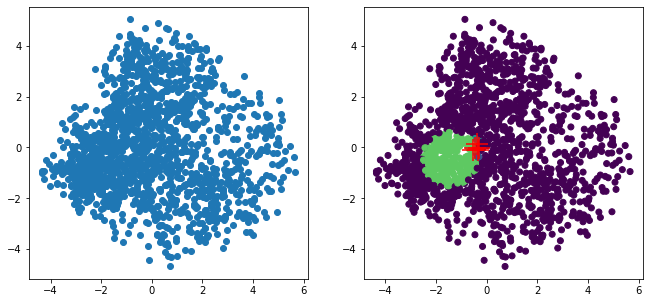

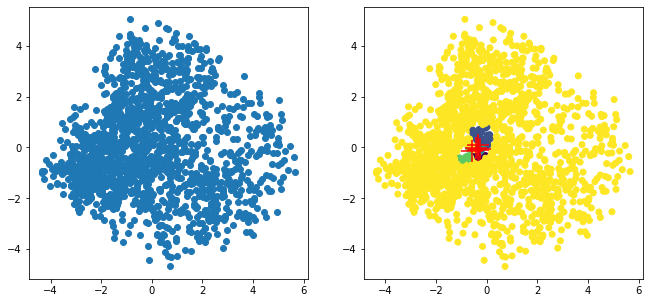

In [27]:
#class_labels for the handritting data
plot_it(reduced_data,class_labels)

## Cmeans

Centers


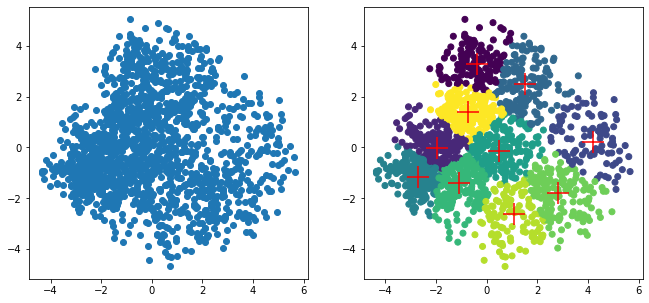

In [28]:
tesC = fcmeans(reduced_data,10) 

In [29]:
#All the data clustering distribution
tesB = fcmeans2(x,10)

In [30]:
d_fcmeans(tesB,tcat) 

Cluster : 0 Class count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([101,   7,  39,  85,  52, 114,  83,   4,  60,  78]))
Cluster : 1 Class count : (array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([148, 109,  65,  36,  24,  15, 153,  77,  59]))
Cluster : 2 Class count : (array([0, 2, 3, 4, 5, 6, 8]), array([ 8,  2,  3, 16,  2,  2,  2]))
Cluster : 3 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([5, 2, 2, 5, 2, 4, 6]))
Cluster : 4 Class count : (array([0, 1, 3, 4, 5, 6, 7, 8, 9]), array([1, 6, 2, 3, 2, 3, 1, 5, 4]))
Cluster : 5 Class count : (array([1, 4, 5, 6, 8, 9]), array([1, 9, 3, 1, 1, 3]))
Cluster : 6 Class count : (array([2, 4, 6, 8]), array([1, 2, 2, 3]))
Cluster : 7 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([46,  2, 36,  8, 53,  3,  6]))
Cluster : 8 Class count : (array([2, 4]), array([1, 5]))
Cluster : 9 Class count : (array([2, 3, 5, 9]), array([3, 4, 1, 2]))


## Kmeans

In [31]:
best_modelt = Kmeans_c(10, 10, x)

Inertia for the models
[66383.42312735146, 66710.4037769702, 66979.75427953526, 66624.23041208868, 66514.82364007954, 66732.224606208, 66513.69056204539, 66398.0946279249, 67250.05004745733, 66615.6853838124, 66546.88823964084]

Min Inertia
66383.42312735146

Low Inertia model
KMeans(init=array([[0.09335567, 0.21676256, 0.2444384 , ..., 0.22072587, 0.31963985,
        0.71717078],
       [0.12355771, 0.63741065, 0.44796488, ..., 0.81798191, 0.30658141,
        0.64329139],
       [0.25533262, 0.92040076, 0.64094935, ..., 0.2907311 , 0.8236131 ,
        0.032715  ],
       ...,
       [0.62431878, 0.1300234 , 0.80688885, ..., 0.85354607, 0.27436185,
        0.98153967],
       [0.73532964, 0.00778349, 0.06171343, ..., 0.93470461, 0.14702329,
        0.84538237],
       [0.1471191 , 0.99720177, 0.43514078, ..., 0.16808854, 0.56587518,
        0.42059228]]),
       n_clusters=10, n_init=1, random_state=0)


In [32]:
#The distribution of the data in clusters
d_model(best_modelt,tcat)

Cluster : 0 Class count : (array([0, 5, 6, 8]), array([69,  2, 38,  1]))
Cluster : 1 Class count : (array([2, 3, 4, 7, 8, 9]), array([ 1,  6,  4,  1, 44, 96]))
Cluster : 2 Class count : (array([1, 2, 3, 5, 6, 8, 9]), array([  2,   1, 137,  60,   1,  23,  32]))
Cluster : 3 Class count : (array([0, 1, 2, 4, 6, 7]), array([  3,   1,   4, 127,   1,   1]))
Cluster : 4 Class count : (array([1, 2, 3, 4, 7, 8, 9]), array([102,  17,   7,   9,  22,   2,   5]))
Cluster : 5 Class count : (array([0, 6, 9]), array([86,  1,  2]))
Cluster : 6 Class count : (array([0, 1, 2, 4, 5, 6, 8]), array([  1,   1,   4,   2,   1, 110,   2]))
Cluster : 7 Class count : (array([0, 1, 2, 3, 4, 6, 7, 8, 9]), array([ 2,  4, 89,  6,  1,  7,  7, 80, 12]))
Cluster : 8 Class count : (array([1, 2, 3, 4, 5, 6, 8, 9]), array([ 2,  2,  2,  4, 95,  3,  1,  6]))
Cluster : 9 Class count : (array([1, 2, 3, 4, 5, 7, 8, 9]), array([ 50,  41,   1,  14,   1, 127,   2,   5]))


In [33]:
#reduced_datar.explained_variance_ratio for the 2 main principal components 
pca.explained_variance_ratio_

array([0.07828544, 0.06658118])

Inertia for the models
[1360.1492115579335, 1365.4811679005484, 1372.5404920490503, 1364.8324376919925, 1382.4460327477789, 1369.7165168553724, 1378.0907231509068, 1374.351423107765, 1353.132078054171, 1373.7081819786795, 1400.9126989312856]

Min Inertia
1353.132078054171

Low Inertia model
KMeans(init=array([[0.1090435 , 0.21169745],
       [0.11813195, 0.24040061],
       [0.07178837, 0.68481437],
       [0.05226657, 0.97531528],
       [0.61577453, 0.14198471],
       [0.84976831, 0.39701357],
       [0.44316878, 0.2940171 ],
       [0.20218041, 0.48199369],
       [0.95098263, 0.09283649],
       [0.83717848, 0.46589321]]),
       n_clusters=10, n_init=1, random_state=0)


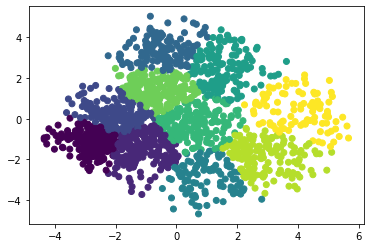

In [34]:
# Plot the predictions reduced data for visualization purposes 
rdata = Kmeans_c(10, 10,reduced_data)
predictc = rdata.predict(reduced_data)
#predict = best_model.predict(X)
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=predictc)

In [35]:
# Arranging the 256 columns as a 16x16 matrix
x[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

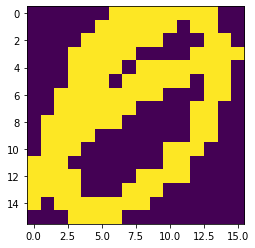

In [36]:
# Visualizing the 16x16 matrix as image
plt.imshow(x[0].reshape((16,16)))

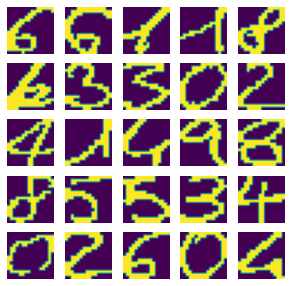

In [37]:
# Visualizing the Image data. Visualizing 25 images from the data as a 5x5 matrix
_, axarr = plt.subplots(5,5,figsize=(5,5))
for i in range(5):
    for j in range(5):
        # Per iteration in the loop, picking one row randomly to display in our 5x5 matrix
        axarr[i,j].imshow(x[np.random.randint(x.shape[0])].reshape((16,16)))          
        axarr[i,j].axis('off') #hiding the axis values for all the 25 images

### For the last part of the question to see the labels that are not classified well i believe that the usage of either Deep learning algorithms or classical machine learning will be necessary. In this case am going to use machine learning.  Though i did highlight that through the distributions. 


In [119]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [120]:
# Get the data
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]

In [121]:
# Just reconverted the original data into this way it was way easier operating in this mode 
data = np.asarray(data)
data = data.astype(float)

In [122]:
# The x values 
X = data[:,:-10]
print(X.shape)
X

(1593, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
# The y values 
y = data[:,-10:]
print(y.shape)
y

(1593, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [124]:
# Matrix as a 16 by 16 for an individual element
X[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

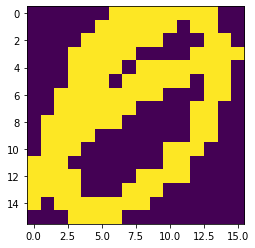

In [125]:
# Visualizing the 16x16 matrix as image
plt.imshow(X[0].reshape((16,16)))

In [153]:
# Data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [141]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))
my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.3375 - accuracy: 0.1154 - val_loss: 2.2552 - val_accuracy: 0.1493
Epoch 2/60
25/25 - 0s - loss: 2.0688 - accuracy: 0.2936 - val_loss: 2.0339 - val_accuracy: 0.2119
Epoch 3/60
25/25 - 0s - loss: 1.8532 - accuracy: 0.4718 - val_loss: 1.8506 - val_accuracy: 0.2030
Epoch 4/60
25/25 - 0s - loss: 1.6129 - accuracy: 0.6282 - val_loss: 1.4646 - val_accuracy: 0.7045
Epoch 5/60
25/25 - 0s - loss: 1.3882 - accuracy: 0.7282 - val_loss: 1.2605 - val_accuracy: 0.7403
Epoch 6/60
25/25 - 0s - loss: 1.1964 - accuracy: 0.7923 - val_loss: 1.0682 - val_accuracy: 0.8418
Epoch 7/60
25/25 - 0s - loss: 1.0407 - accuracy: 0.8000 - val_loss: 0.9540 - val_accuracy: 0.8269
Epoch 8/60
25/25 - 0s - loss: 0.9255 - accuracy: 0.8295 - val_loss: 0.8287 - val_accuracy: 0.8627
Epoch 9/60
25/25 - 0s - loss: 0.8171 - accuracy: 0.8590 - val_loss: 0.7455 - val_accuracy: 0.8806
Epoch 10/60
25/25 - 0s - loss: 0.7318 - accuracy: 0.8654 - val_loss: 0.6842 - val_accuracy: 0.8866
Epoch 11/60
25/25 -

In [142]:
preds = np.argmax(y_pred, axis = 1)
preds

array([7, 3, 9, 4, 1, 0, 8, 4, 6, 7, 3, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 9, 2, 5, 6, 8, 2, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 4, 7, 9, 1, 6, 0, 1, 0, 0, 6, 9, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 0, 4, 4, 1, 7, 4, 0, 2, 6, 2, 7, 2, 3,
       5, 2, 7, 3, 2, 3, 2, 0, 0, 9, 7, 1, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       2, 7, 0, 8, 9, 9, 9, 3, 8, 4, 1, 4, 8, 3, 0, 3, 3, 3, 2, 6, 3, 5,
       2, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 9, 3, 4, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 0, 0, 5, 9, 8, 5, 4, 0, 1, 1, 1, 5, 7, 5, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 1, 0, 6, 2, 8, 3, 1, 2, 4, 0, 5, 1, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 2, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 1, 7, 2, 5, 0, 9, 5, 4, 9, 4, 3, 1, 6, 3, 9, 4, 3, 8, 8,
       1, 7, 9, 3, 3, 2, 6, 0, 5, 0, 7, 8, 5, 0, 4, 5, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 3, 1, 9, 0, 8, 0,
       3, 8, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

In [143]:
real_vals = np.argmax(y_test, axis = 1)
real_vals

array([7, 9, 9, 4, 1, 0, 8, 4, 6, 7, 9, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 7, 2, 5, 6, 8, 8, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 7, 7, 9, 1, 5, 0, 1, 0, 0, 6, 5, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 0, 4, 4, 1, 7, 4, 0, 2, 6, 2, 5, 2, 1,
       5, 8, 7, 3, 2, 3, 2, 0, 0, 9, 7, 2, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       8, 7, 0, 0, 9, 8, 9, 3, 8, 4, 1, 4, 8, 3, 0, 3, 7, 5, 2, 6, 3, 5,
       8, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 1, 3, 2, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 8, 0, 5, 9, 8, 5, 4, 0, 1, 7, 1, 5, 7, 5, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 7, 0, 6, 2, 8, 3, 1, 2, 4, 6, 5, 4, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 1, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 7, 7, 2, 5, 0, 9, 5, 4, 7, 6, 8, 3, 6, 9, 9, 4, 9, 8, 8,
       1, 7, 9, 3, 9, 8, 6, 0, 5, 0, 7, 8, 5, 0, 4, 3, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 3, 1, 9, 0, 8, 0,
       3, 3, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

In [144]:
#Getting the misclassified data by digits
misclassified = []
indices = []
most = [9,1,3]
nines = []
ones = []
tres = []
twos = []
for i, v in enumerate(preds):
    if (preds[i]!=real_vals[i]):
        misclassified.append(v)
        indices.append(i)
        if(v ==9):
            nines.append(i)
        if(v ==1):
            ones.append(i)
        if(v ==3):
            tres.append(i)
        if(v==2):
            twos.append(i)

In [145]:
# Misclassified numbers
np.array(misclassified)

array([3, 3, 9, 2, 4, 6, 9, 7, 3, 2, 1, 2, 8, 9, 3, 3, 2, 9, 4, 0, 1, 1,
       0, 1, 2, 1, 9, 4, 3, 1, 3, 3, 3, 2, 5, 8, 1, 4, 1, 8, 8, 9, 4, 9,
       9, 9, 9, 9, 3, 0])

In [146]:
#Most misclassified numbers 
np.unique(np.array(misclassified), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 3,  8,  6, 10,  5,  1,  1,  1,  4, 11]))

In [147]:
np.array(indices)

array([  1,  10,  28,  33,  53,  57,  63,  85,  87,  89,  99, 110, 113,
       115, 126, 127, 132, 143, 145, 157, 166, 182, 191, 193, 209, 223,
       231, 232, 233, 234, 236, 239, 246, 247, 257, 287, 308, 315, 327,
       331, 352, 362, 365, 382, 391, 429, 431, 440, 441, 477])

In [148]:
len(tres)

10

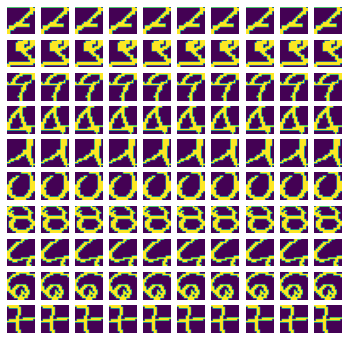

In [149]:
def vis_images(lis,size,data):
    _, axarr = plt.subplots(len(lis),len(lis),figsize=(size,size))
    for i in range(len(lis)):
        for j in range(len(lis)):
            axarr[i,j].imshow(data[i].reshape((16,16)))          
            axarr[i,j].axis('off')
            
vis_images(tres,6,X_test) 

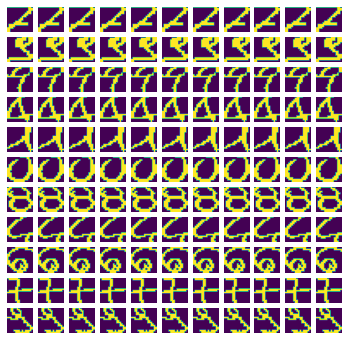

In [150]:
vis_images(nines,6,X_test)

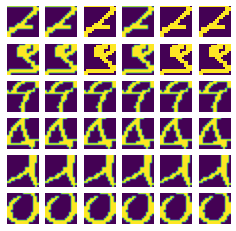

In [151]:
vis_images(twos,4,X_test)

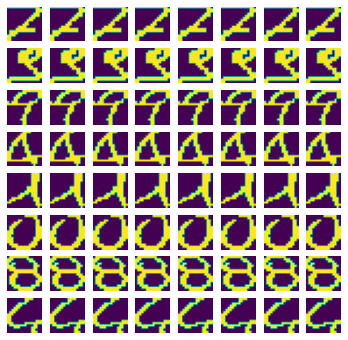

In [152]:
vis_images(ones,6,X_test)